# Analyze 311 dataset from NYC

## 1. step

Load dataset and check dimensions

In [231]:
# Read 311 data from local file system

import pandas as pd

df_311 = pd.read_csv("fhrw-4uyv.csv", parse_dates=True)

In [232]:
# get the dataset dimensions

num_rows, num_cols = df_311.shape
print ("The 311 dataset has %d rows and %d columns" % (num_rows,num_cols))

df_311.head()

The 311 dataset has 5735329 rows and 15 columns


address_type      borough            city              closed_date  \
0          NaN  Unspecified             NaN  2013-01-11T15:01:56.000   
1      ADDRESS       QUEENS  Queens Village  2019-03-30T08:58:02.000   
2      ADDRESS       QUEENS  Queens Village  2019-03-30T08:58:01.000   
3      ADDRESS       QUEENS  Queens Village  2019-03-30T08:58:01.000   
4      ADDRESS       QUEENS    Saint Albans  2019-03-30T08:58:02.000   

           complaint_type             created_date   incident_address  \
0  HPD Literature Request  2013-01-11T13:25:34.000                NaN   
1           PAINT/PLASTER  2018-08-11T19:19:41.000  104-34 219 STREET   
2               APPLIANCE  2018-08-11T19:19:41.000  104-34 219 STREET   
3    UNSANITARY CONDITION  2018-08-11T19:19:41.000  104-34 219 STREET   
4             DOOR/WINDOW  2018-10-23T19:27:06.000  116-35 195 STREET   

   incident_zip   latitude         location_type  longitude  \
0           NaN        NaN                   NaN        NaN   
1       11429.0  40.711539  RESIDENTIAL BUILDING -73.735724   
2       11429.0  40.711539  RESIDENTIAL BUILDING -73.735724   
3       11429.0  40.711539  RESIDENTIAL BUILDING -73.735724   
4       11412.0  40.693715  RESIDENTIAL BUILDING -73.757117   

                              resolution_description  status street_name  \
0  The literature has been mailed. If it has not ...  Closed         NaN   
1  The Department of Housing Preservation and Dev...  Closed  219 STREET   
2  The Department of Housing Preservation and Dev...  Closed  219 STREET   
3  The Department of Housing Preservation and Dev...  Closed  219 STREET   
4  The Department of Housing Preservation and Dev...  Closed  195 STREET   

   unique_key  
0    24765056  
1    39981834  
2    39982698  
3    39987943  
4    40636028

In [233]:
# show how many missing values we have
df_311.isnull().sum()

address_type               78865
borough                        0
city                       81323
closed_date               132006
complaint_type                 0
created_date                   0
incident_address           53588
incident_zip               81692
latitude                   81666
location_type              53587
longitude                  81666
resolution_description      6067
status                         0
street_name                53588
unique_key                     0
dtype: int64

## 2. step

In first part I found out that complaints about heating are the most challenging ones. So reduce the dataset on those related to them

In [234]:
# select only rows related to heating complaints

df_heat = df_311[(df_311["complaint_type"] == "HEATING") | (df_311["complaint_type"] == "HEAT/HOT WATER")]
print ("%d complaints related to heating.\n\n" % len(df_heat))

df_heat.head()

2019043 complaints related to heating.




address_type   borough       city              closed_date  \
154      ADDRESS    QUEENS  Ridgewood  2019-03-30T08:11:05.000   
155      ADDRESS  BROOKLYN   BROOKLYN  2019-03-28T02:08:55.000   
157      ADDRESS    QUEENS    Astoria  2019-03-30T02:06:02.000   
160      ADDRESS     BRONX      BRONX  2019-03-30T02:08:48.000   
161      ADDRESS     BRONX      BRONX  2019-03-30T02:06:18.000   

     complaint_type             created_date       incident_address  \
154  HEAT/HOT WATER  2019-03-25T16:31:21.000        71-21 65 STREET   
155  HEAT/HOT WATER  2019-03-26T21:10:48.000         10412 AVENUE L   
157  HEAT/HOT WATER  2019-03-27T04:36:22.000  31-35 CRESCENT STREET   
160  HEAT/HOT WATER  2019-03-27T17:52:17.000         930 FOX STREET   
161  HEAT/HOT WATER  2019-03-27T21:16:20.000    3525 DECATUR AVENUE   

     incident_zip   latitude         location_type  longitude  \
154       11385.0  40.701989  RESIDENTIAL BUILDING -73.890577   
155       11236.0  40.642237  RESIDENTIAL BUILDING -73.889760   
157       11106.0  40.764684  RESIDENTIAL BUILDING -73.927184   
160       10459.0  40.820637  RESIDENTIAL BUILDING -73.893872   
161       10467.0  40.879228  RESIDENTIAL BUILDING -73.872353   

                                resolution_description  status  \
154  The Department of Housing Preservation and Dev...  Closed   
155  The Department of Housing Preservation and Dev...  Closed   
157  The Department of Housing Preservation and Dev...  Closed   
160  The Department of Housing Preservation and Dev...  Closed   
161  The complaint you filed is a duplicate of a co...  Closed   

         street_name  unique_key  
154        65 STREET    42049572  
155         AVENUE L    42061623  
157  CRESCENT STREET    42064133  
160       FOX STREET    42065237  
161   DECATUR AVENUE    42065248

In [235]:
# show how many missing values we have
df_heat.isnull().sum()

address_type              17997
borough                       0
city                      18841
closed_date               15536
complaint_type                0
created_date                  0
incident_address              1
incident_zip              18961
latitude                  18957
location_type                 0
longitude                 18957
resolution_description      195
status                        0
street_name                   1
unique_key                    0
dtype: int64

## 2. step

Analyze the locations of the heating complaints

Adress types: 

 [nan 'ADDRESS']


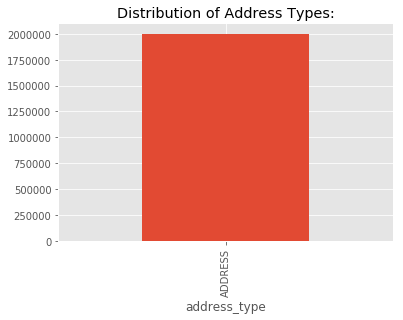

In [236]:
# see what address types we have

print ("Adress types: \n\n", df_311['address_type'].unique())

# see how the adress_types are distributed

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline 

mpl.style.use('ggplot') # for ggplot-like style

df_heat.groupby(['address_type']).size().sort_values(ascending=False).plot('bar', title="Distribution of Address Types:")


Boroughs: 

 ['Unspecified' 'QUEENS' 'MANHATTAN' 'BRONX' 'BROOKLYN' 'STATEN ISLAND'] 




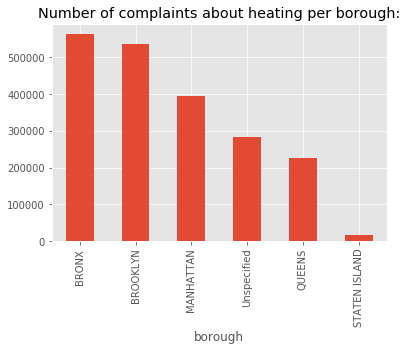

In [237]:
# see what boroughs we have

print ("Boroughs: \n\n", df_311['borough'].unique(), "\n\n")

# see how the boroughs are distributed

df_heat.groupby(['borough']).size().sort_values(ascending=False).plot('bar', title="Number of complaints about heating per borough:")


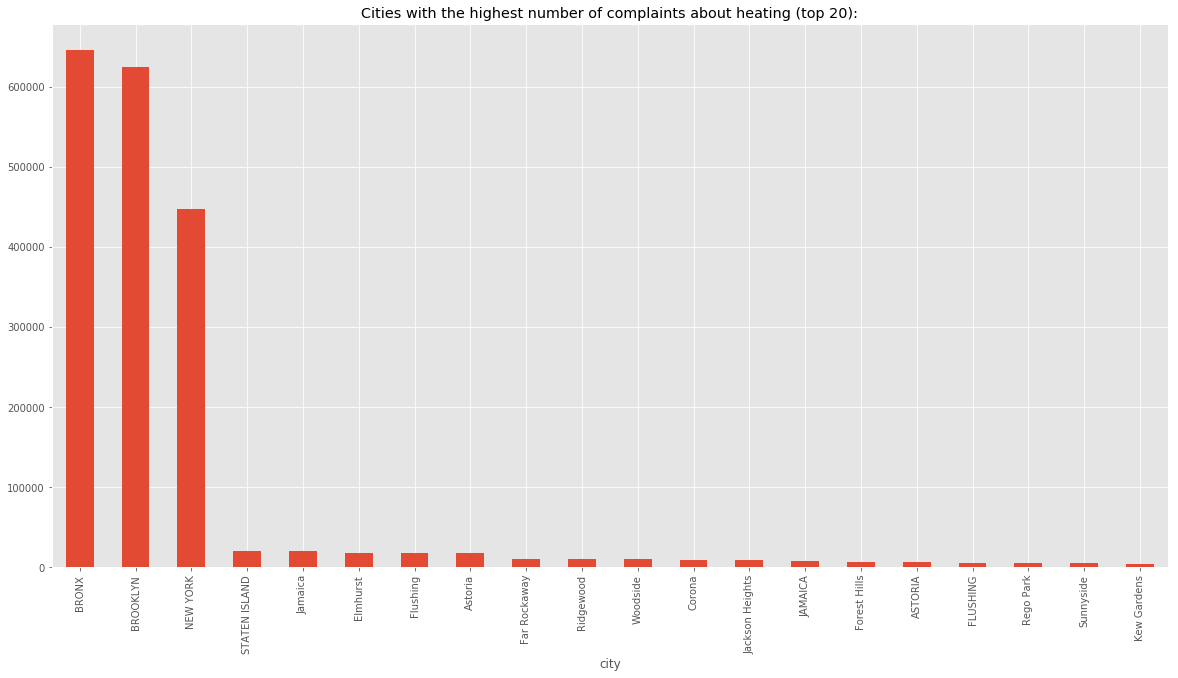

In [238]:
# see how the cities are distributed

df_heat.groupby(['city']).size().sort_values(ascending=False).head(20).plot('bar', figsize=(20,10), 
           title="Cities with the highest number of complaints about heating (top 20):")


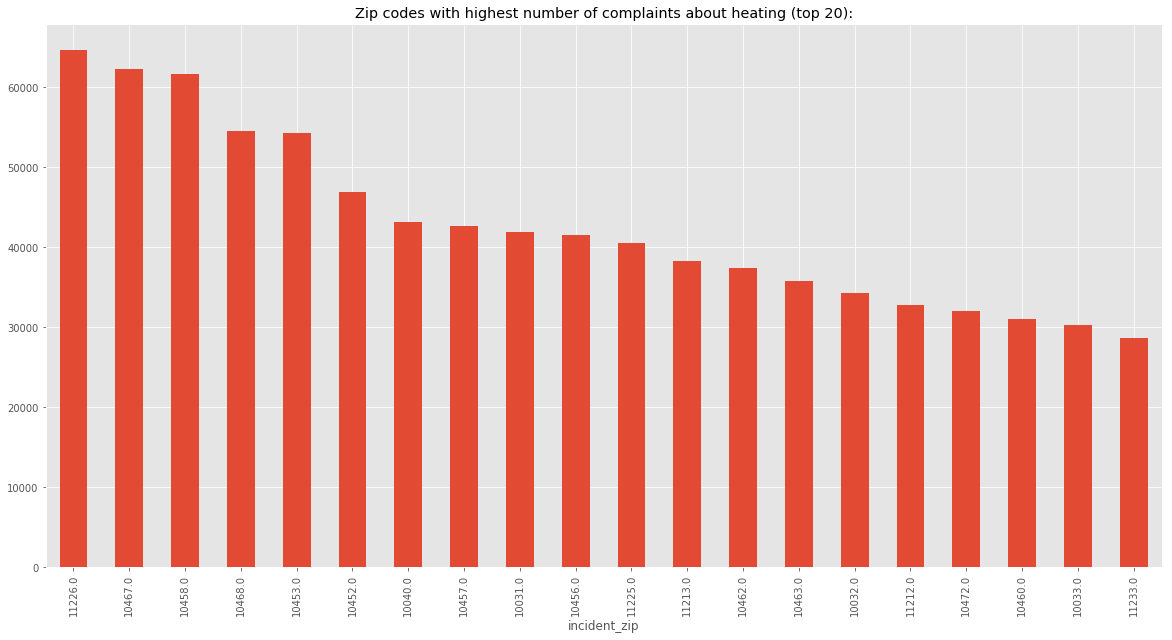

In [239]:
# see how the zips are distributed

df_heat.groupby(['incident_zip']).size().sort_values(ascending=False).head(20).plot('bar', figsize=(20,10), 
    title="Zip codes with highest number of complaints about heating (top 20):")


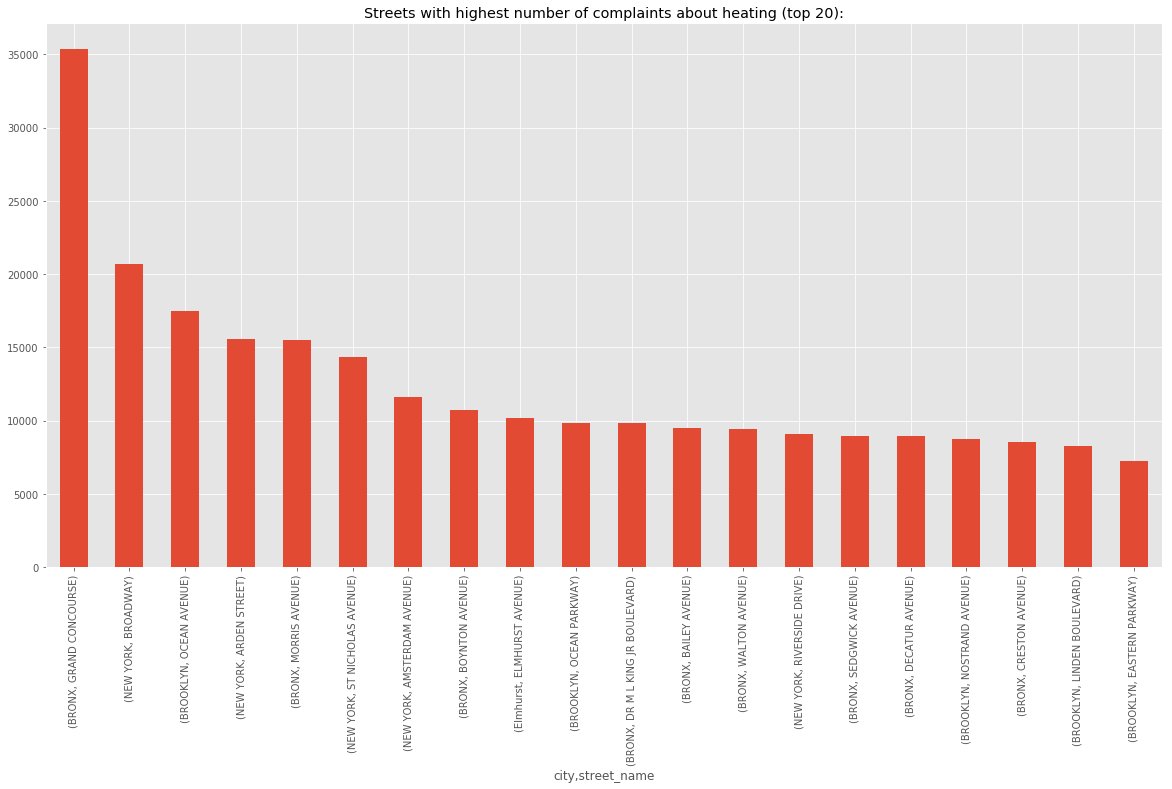

In [240]:
# see how the complaints in streets are distributed

df_heat.groupby(['city', 'street_name']).size().sort_values(ascending=False).head(20).plot('bar', figsize=(20,10), 
    title="Streets with highest number of complaints about heating (top 20):")


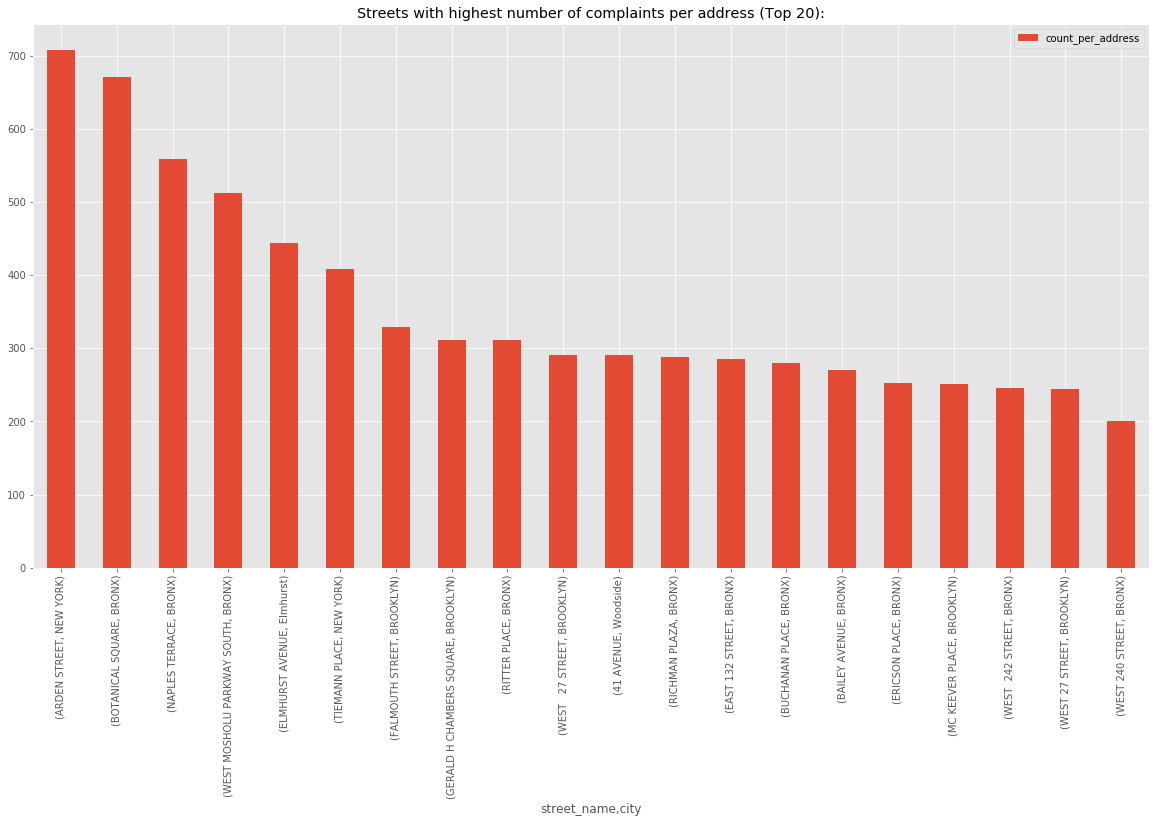

In [241]:
# streets with the highest number of complaints per address

# number of incidents per street
df_streets_incidents = df_heat.groupby(['street_name','city']).size().to_frame().reset_index()
df_streets_incidents.columns = ['street_name', 'city', 'count']

# number of addresses in each street
df_streets_addresses  = df_heat.groupby(['street_name','city'])['incident_address'].nunique().to_frame().reset_index()
df_streets_addresses.columns = ['street_name', 'city', 'numaddr']

# join both and calculate number of complaints/address count ⇒ number of complaints per address in each street
df_streets_ia = pd.merge(df_streets_incidents, df_streets_addresses)
df_streets_ia["count_per_address"] = df_streets_ia["count"]/df_streets_ia["numaddr"]
df_streets_ia = df_streets_ia.set_index(['street_name', 'city']).sort_values(by=["count_per_address"], ascending=False).head(20)

# see how the streets with high number of complaints per address are distributed

df_streets_ia.head(20).plot(y=['count_per_address'], kind='bar', figsize=(20,10), 
    title="Streets with highest number of complaints per address (Top 20):")


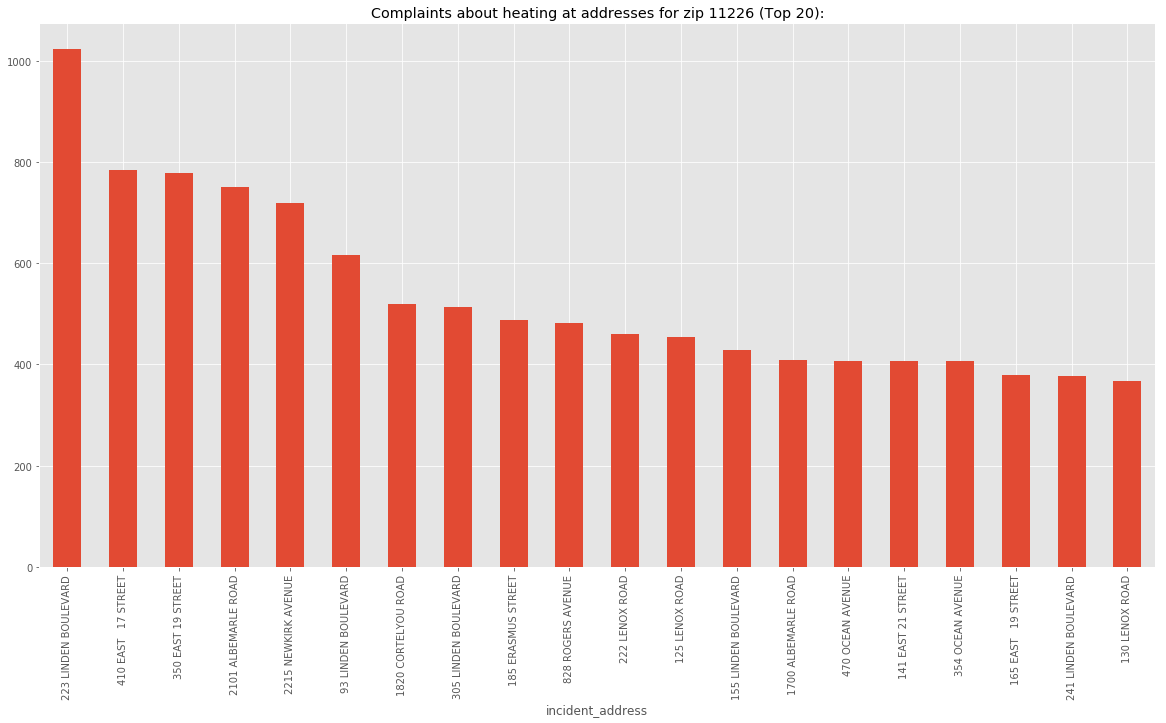

In [242]:
# see what adresses we have at top zip

df_11226 = df_heat[(df_heat["incident_zip"] == 11226.0)]

df_11226.groupby(['incident_address']).size().sort_values(ascending=False).head(20).plot('bar', figsize=(20,10), 
    title="Complaints about heating at addresses for zip 11226 (Top 20):")


## 3. Step

Summing the number of complaints per city, borough or street gives no hint on where to look for problems. Visualize the complaints on a map.

In [243]:
# to see where the complaints are, put them on a map

#!pip install folium
import folium
from folium.plugins import HeatMap

# define the map 
city_map = folium.Map(location=[40.701989, -73.890577], zoom_start=11) #, tiles='Mapbox Bright')

# remove rows without data
df_map = df_heat.dropna()

# generate heatmap
HeatMap(data=df_map[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(city_map)

# add a small legend
legend_html = '''
     <div style="position: fixed;
     bottom: 40px; left: 850px; width: 250px; height: 40px;
     border:3px solid grey; z-index:9999; font-size:14px; background:white
     ">Heatmat for complaints about heating
      </div>
     '''
city_map.get_root().html.add_child(folium.Element(legend_html))

#display map
city_map


In [244]:
# Show the top streets on map

# select the complaints for the top streets
df_streets = df_heat[((df_heat["street_name"] == "GRAND CONCOURSE") & (df_heat["city"] == "BRONX")) | 
                      ((df_heat["street_name"] == "BROADWAY") & (df_heat["city"] == "NEW YORK")) |
                      ((df_heat["street_name"] == "OCEAN AVENUE") & (df_heat["city"] == "BROOKLYN"))]

# define the map 
city_map = folium.Map(location=[40.701989, -73.890577], zoom_start=11) #, tiles='Mapbox Bright')

# remove rows without data
df_map = df_streets.dropna()
print(df_map.shape)
# generate heatmap
HeatMap(data=df_map[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(city_map)

# add a small legend
legend_html = '''
     <div style="position: fixed;
     bottom: 40px; left: 850px; width: 250px; height: 50px;
     border:3px solid grey; z-index:9999; font-size:14px; background:white
     ">Heatmat for complaints in streets with most complaints about heating (top3)
      </div>
     '''
city_map.get_root().html.add_child(folium.Element(legend_html))

#display map
city_map


(72973, 15)


## Result

There is no special hot spot for complaints about heating but the cities of Bronx, Brooklyn and New York have the most complaints. Top streets are the Grand Concourse in Bronx, Broadway in New York and Ocean Avenue in Brooklyn.

To adress complaints effectively the location information gives no hint.
